In [ ]:
pip install pydot

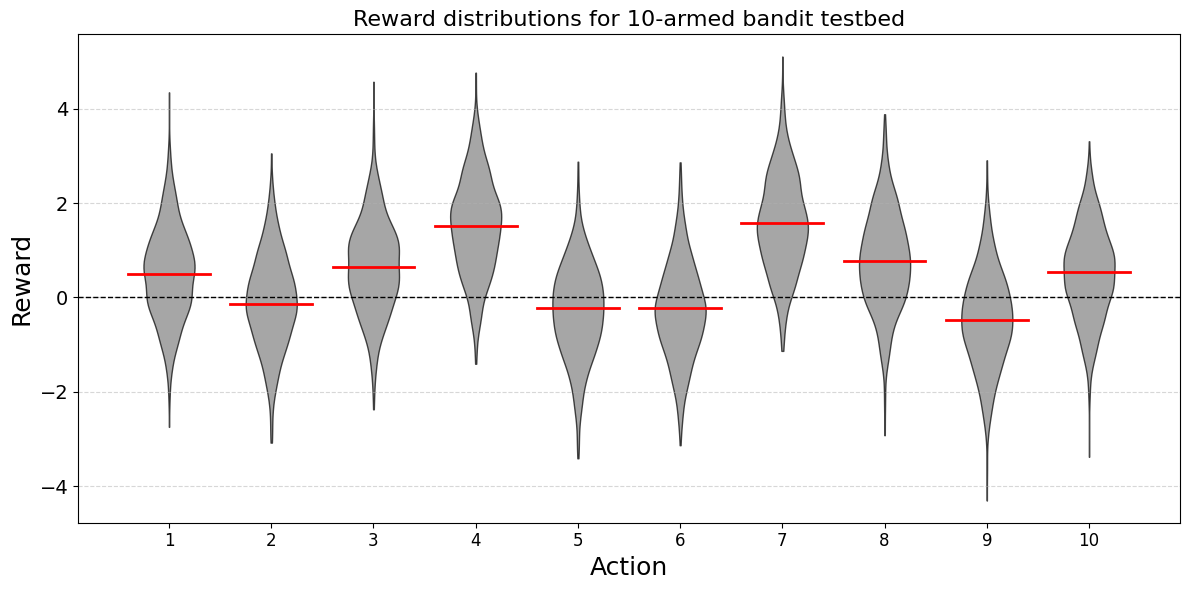

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility (optional)
np.random.seed(42)

# Set the number of actions
num_actions = 10

# Generate true action values q*(a) from N(0, 1)
q_star = np.random.normal(0, 1, num_actions)

# For each action, generate samples from N(q*(a), 1)
num_samples_per_action = 1000  # Number of samples per action for smooth violin plots
reward_samples = []
for q in q_star:
    samples = np.random.normal(q, 1, num_samples_per_action)
    reward_samples.append(samples)

# Create a vertical violin plot without sorting q_star
plt.figure(figsize=(12, 6))
violin_parts = plt.violinplot(reward_samples, showmeans=False, showmedians=False, showextrema=False)

# Customize the violin plots
for pc in violin_parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Plot red lines at q_star for each action
positions = np.arange(1, num_actions + 1)
for pos, q in zip(positions, q_star):
    plt.plot([pos - 0.4, pos + 0.4], [q, q], color='red', linewidth=2)

# Add a dotted horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Labeling the plot with enlarged font sizes
plt.title('Reward distributions for 10-armed bandit testbed', fontsize=16)
plt.xlabel('Action', fontsize=18)
plt.ylabel('Reward', fontsize=18)

# Set x-ticks to show action numbers with enlarged font size
plt.xticks(positions, [f'{i}' for i in positions], fontsize=12)
plt.yticks(fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.savefig('Bandit distribution.jpg', format='jpeg')
plt.show()


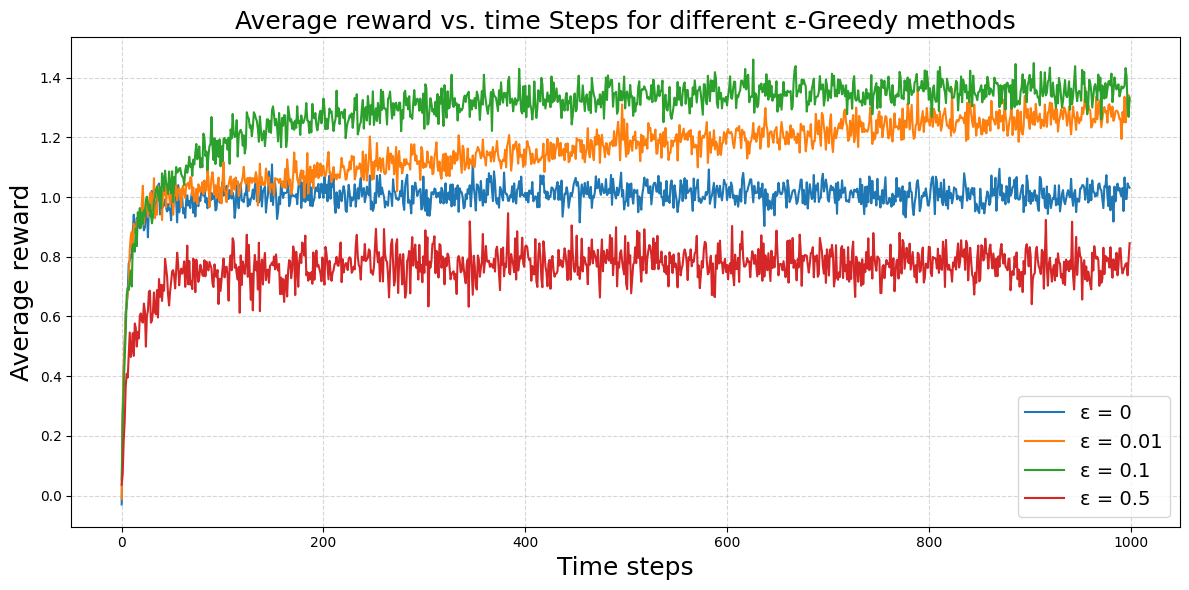

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10         # Number of actions (arms)
num_steps = 1000         # Number of time steps per run
num_runs = 1000          # Number of independent runs (tests)
epsilon_values = [0, 0.01, 0.1, 0.5]  # Different epsilon values

# Initialize arrays to store average rewards
average_rewards = np.zeros((len(epsilon_values), num_steps))

# Loop over each epsilon value
for idx, epsilon in enumerate(epsilon_values):
    rewards = np.zeros((num_runs, num_steps))  # Rewards for each run and step

    # Loop over each run
    for run in range(num_runs):
        # Initialize true action values q*(a) for this run from N(0,1)
        q_star = np.random.normal(0, 1, num_actions)

        # Initialize estimated action values Q(a) to zero
        Q = np.zeros(num_actions)

        # Initialize action counts N(a) to zero
        N = np.zeros(num_actions)

        # Loop over each time step
        for step in range(num_steps):
            # Choose action based on epsilon-greedy policy
            if np.random.rand() < epsilon:
                # Exploration: choose a random action
                action = np.random.randint(num_actions)
            else:
                # Exploitation: choose the action with the highest estimated value
                max_Q = np.max(Q)
                # Handle multiple actions with the same max estimated value
                actions_with_max_Q = np.where(Q == max_Q)[0]
                action = np.random.choice(actions_with_max_Q)

            # Receive reward from the selected action
            reward = np.random.normal(q_star[action], 1)

            # Update action count
            N[action] += 1

            # Update estimated action value using sample-average method
            Q[action] += (reward - Q[action]) / N[action]

            # Store reward
            rewards[run, step] = reward

    # Calculate average reward over all runs for each time step
    average_rewards[idx] = rewards.mean(axis=0)

# Plotting the results
plt.figure(figsize=(12, 6))

for idx, epsilon in enumerate(epsilon_values):
    plt.plot(average_rewards[idx], label=f'ε = {epsilon}')

# Labeling the plot with enlarged font sizes
plt.title('Average reward vs. time Steps for different ε-Greedy methods', fontsize=18)
plt.xlabel('Time steps', fontsize=18)
plt.ylabel('Average reward', fontsize=18)

# Add a legend with enlarged font size
plt.legend(fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.savefig('Bandit average rewards.jpg', format='jpeg')
plt.show()


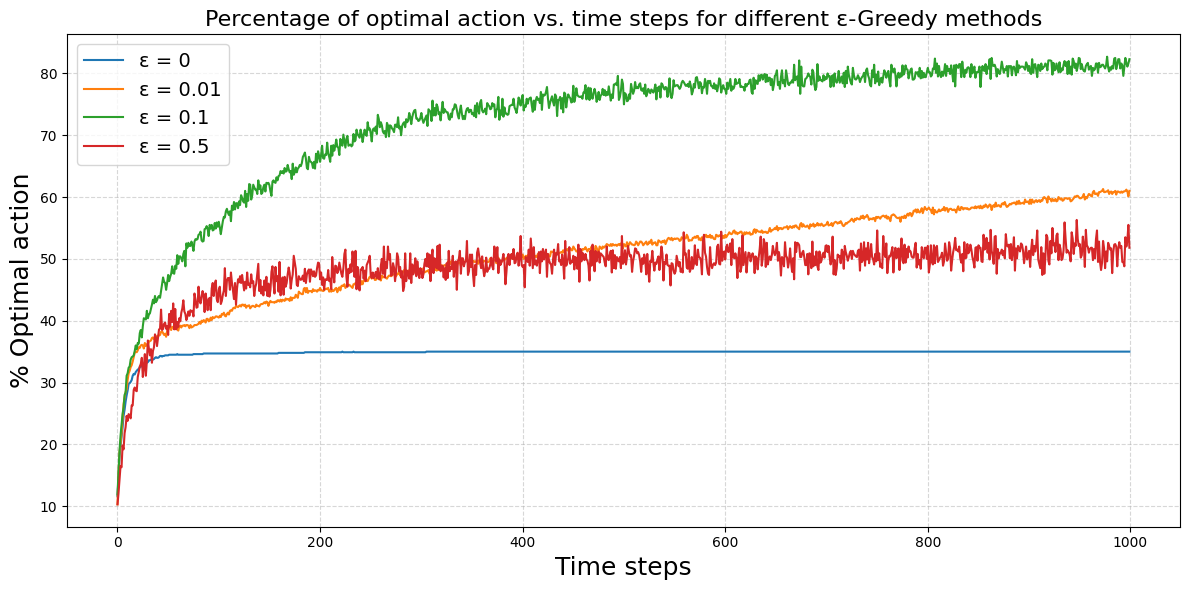

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10         # Number of actions (arms)
num_steps = 1000         # Number of time steps per run
num_runs = 1000          # Number of independent runs (tests)
epsilon_values = [0, 0.01, 0.1, 0.5]  # Different epsilon values

# Initialize arrays to store optimal action percentages
optimal_action_counts = np.zeros((len(epsilon_values), num_steps))

# Loop over each epsilon value
for idx, epsilon in enumerate(epsilon_values):
    optimal_actions = np.zeros((num_runs, num_steps))  # Optimal action indicator for each run and step

    # Loop over each run
    for run in range(num_runs):
        # Initialize true action values q*(a) for this run from N(0,1)
        q_star = np.random.normal(0, 1, num_actions)

        # Identify the optimal action(s)
        optimal_action = np.argmax(q_star)

        # Initialize estimated action values Q(a) to zero
        Q = np.zeros(num_actions)

        # Initialize action counts N(a) to zero
        N = np.zeros(num_actions)

        # Loop over each time step
        for step in range(num_steps):
            # Choose action based on epsilon-greedy policy
            if np.random.rand() < epsilon:
                # Exploration: choose a random action
                action = np.random.randint(num_actions)
            else:
                # Exploitation: choose the action with the highest estimated value
                max_Q = np.max(Q)
                # Handle multiple actions with the same max estimated value
                actions_with_max_Q = np.where(Q == max_Q)[0]
                action = np.random.choice(actions_with_max_Q)

            # Check if the chosen action is optimal
            if action == optimal_action:
                optimal_actions[run, step] = 1  # Mark as optimal action selected

            # Receive reward from the selected action
            reward = np.random.normal(q_star[action], 1)

            # Update action count
            N[action] += 1

            # Update estimated action value using sample-average method
            Q[action] += (reward - Q[action]) / N[action]

    # Calculate percentage of optimal action selections over all runs for each time step
    optimal_action_counts[idx] = optimal_actions.mean(axis=0) * 100

# Plotting the results
plt.figure(figsize=(12, 6))

for idx, epsilon in enumerate(epsilon_values):
    plt.plot(optimal_action_counts[idx], label=f'ε = {epsilon}')

# Labeling the plot with enlarged font sizes
plt.title('Percentage of optimal action vs. time steps for different ε-Greedy methods', fontsize=16)
plt.xlabel('Time steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)

# Add a legend with enlarged font size
plt.legend(fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.savefig('Bandit optimal choice.jpg', format='jpeg')
plt.show()


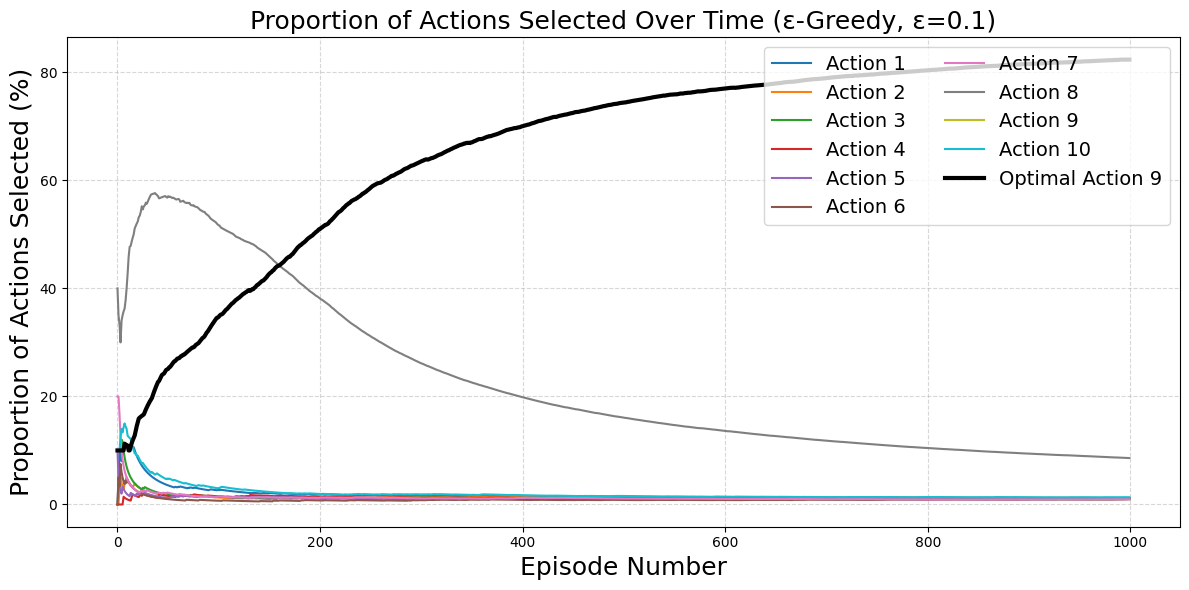

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10         # Number of actions (arms)
num_steps = 1000         # Number of time steps per run
num_runs = 10        # Number of independent runs (tests)
epsilon = 0.1            # Epsilon value for ε-greedy policy

# Initialize arrays to store action selection counts
action_selection_counts = np.zeros((num_runs, num_steps, num_actions))
# Initialize true action values q*(a) for this run from N(0,1)
q_star = np.random.normal(0, 1, num_actions)

# Identify the optimal action(s)
optimal_action = np.argmax(q_star)
# Loop over each run
for run in range(num_runs):


    # Initialize estimated action values Q(a) to zero
    Q = np.zeros(num_actions)

    # Initialize action counts N(a) to zero
    N = np.zeros(num_actions)

    # Initialize cumulative action counts
    cumulative_action_counts = np.zeros((num_steps, num_actions))

    # Loop over each time step
    for step in range(num_steps):
        # Choose action based on epsilon-greedy policy
        if np.random.rand() < epsilon:
            # Exploration: choose a random action
            action = np.random.randint(num_actions)
        else:
            # Exploitation: choose the action with the highest estimated value
            max_Q = np.max(Q)
            # Handle multiple actions with the same max estimated value
            actions_with_max_Q = np.where(Q == max_Q)[0]
            action = np.random.choice(actions_with_max_Q)

        # Receive reward from the selected action
        reward = np.random.normal(q_star[action], 1)

        # Update action count
        N[action] += 1

        # Update estimated action value using incremental implementation
        Q[action] += (reward - Q[action]) / N[action]

        # Record action selection
        action_selection_counts[run, step, action] = 1

# Calculate average cumulative action selection counts over all runs
average_action_selection = action_selection_counts.mean(axis=0)

# Calculate cumulative sums over time for each action
cumulative_action_selection = np.cumsum(average_action_selection, axis=0)

# Calculate proportion of actions selected up to each time step
proportion_actions_selected = cumulative_action_selection / np.arange(1, num_steps + 1)[:, None] * 100

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot proportions for each action
for action in range(num_actions):
    plt.plot(proportion_actions_selected[:, action], label=f'Action {action + 1}')

# Highlight the optimal action
plt.plot(proportion_actions_selected[:, optimal_action], label=f'Optimal Action {optimal_action + 1}', linewidth=3, color='black')

# Labeling the plot with enlarged font sizes
plt.title('Proportion of Actions Selected Over Time (ε-Greedy, ε=0.1)', fontsize=18)
plt.xlabel('Episode Number', fontsize=18)
plt.ylabel('Proportion of Actions Selected (%)', fontsize=18)

# Add a legend with enlarged font size
plt.legend(fontsize=14, loc='upper right', ncol=2)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better fit
plt.tight_layout()
plt.savefig('Bandit incremental choice.jpg', format='jpeg')
# Display the plot
plt.show()


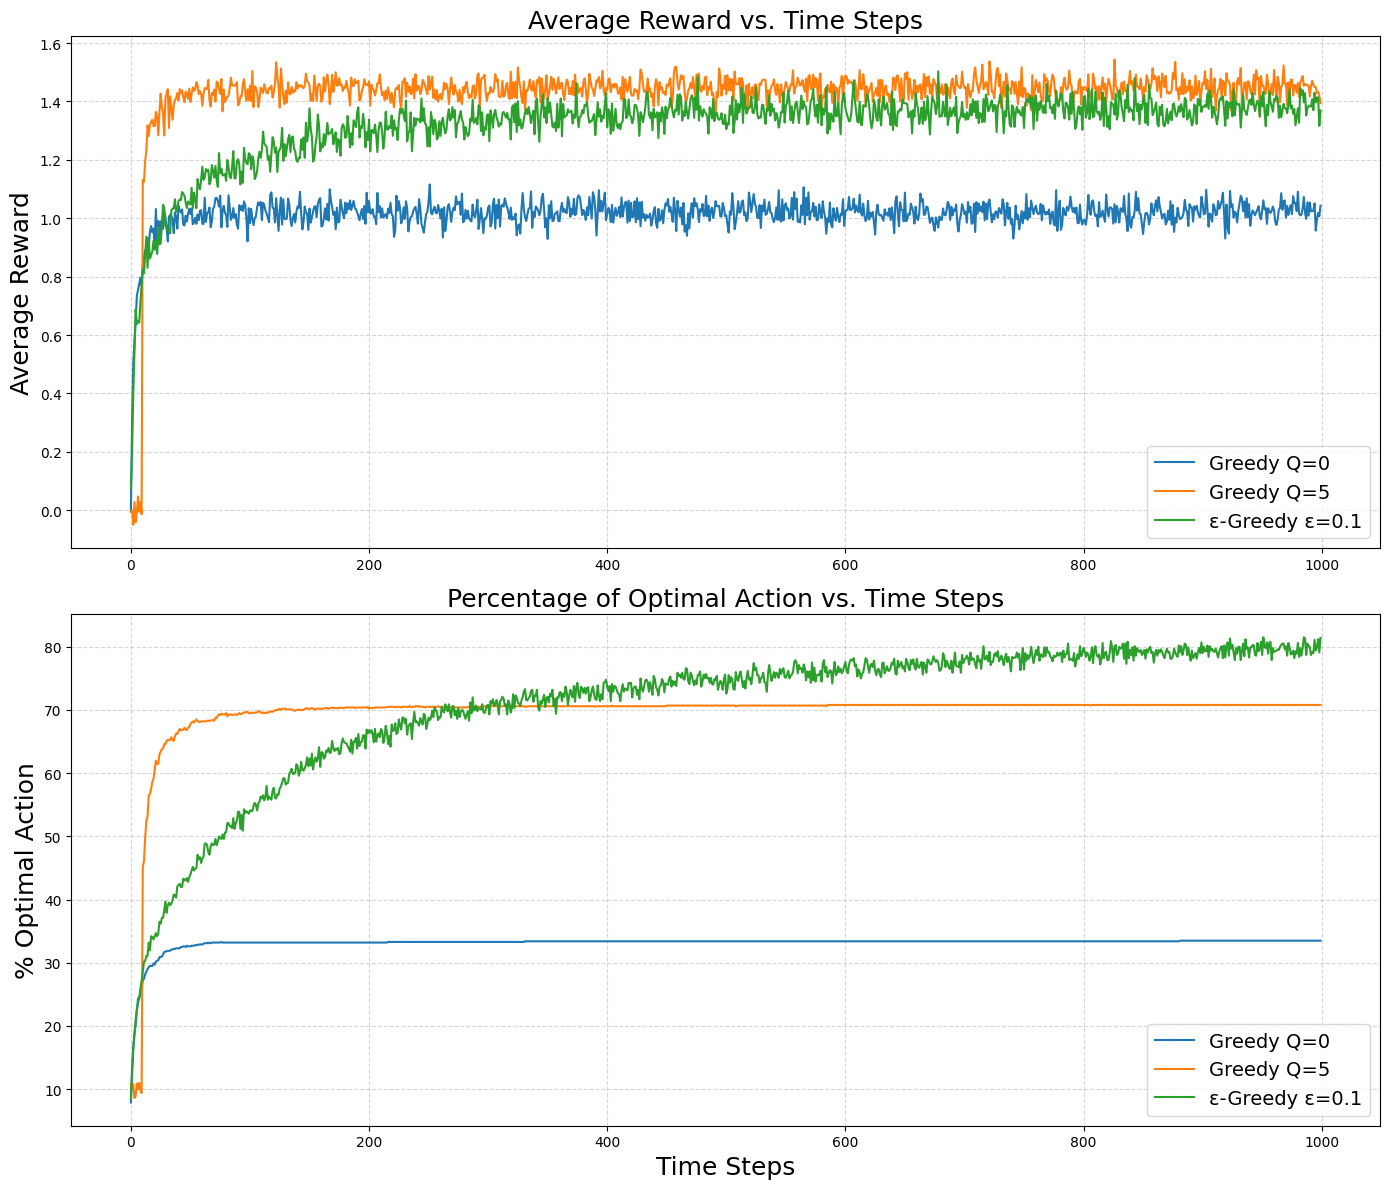

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10         # Number of actions (arms)
num_steps = 1000         # Number of time steps per run
num_runs = 1000          # Number of independent runs (tests)
methods = ['Greedy Q=0', 'Greedy Q=5', 'ε-Greedy ε=0.1']

# Initialize arrays to store average rewards and optimal action percentages
average_rewards = np.zeros((len(methods), num_steps))
optimal_action_counts = np.zeros((len(methods), num_steps))

# Loop over each method
for idx, method in enumerate(methods):
    rewards = np.zeros((num_runs, num_steps))          # Rewards for each run and step
    optimal_actions = np.zeros((num_runs, num_steps))  # Optimal action indicator

    # Set method-specific parameters
    if method == 'Greedy Q=0':
        epsilon = 0
        initial_Q = 0
    elif method == 'Greedy Q=5':
        epsilon = 0
        initial_Q = 5
    elif method == 'ε-Greedy ε=0.1':
        epsilon = 0.1
        initial_Q = 0

    # Loop over each run
    for run in range(num_runs):
        # Initialize true action values q*(a) for this run from N(0,1)
        q_star = np.random.normal(0, 1, num_actions)

        # Identify the optimal action(s)
        optimal_action = np.argmax(q_star)

        # Initialize estimated action values Q(a) with specified initial value
        Q = np.ones(num_actions) * initial_Q

        # Initialize action counts N(a) to zero
        N = np.zeros(num_actions)

        # Loop over each time step
        for step in range(num_steps):
            # Choose action based on epsilon-greedy policy
            if np.random.rand() < epsilon:
                # Exploration: choose a random action
                action = np.random.randint(num_actions)
            else:
                # Exploitation: choose the action(s) with the highest estimated value
                max_Q = np.max(Q)
                # Handle multiple actions with the same max estimated value
                actions_with_max_Q = np.where(Q == max_Q)[0]
                action = np.random.choice(actions_with_max_Q)

            # Check if the chosen action is optimal
            if action == optimal_action:
                optimal_actions[run, step] = 1  # Mark as optimal action selected

            # Receive reward from the selected action
            reward = np.random.normal(q_star[action], 1)

            # Update action count
            N[action] += 1

            # Update estimated action value using sample-average method
            Q[action] += (reward - Q[action]) / N[action]

            # Store reward
            rewards[run, step] = reward

    # Calculate average reward over all runs for each time step
    average_rewards[idx] = rewards.mean(axis=0)

    # Calculate percentage of optimal action selections over all runs for each time step
    optimal_action_counts[idx] = optimal_actions.mean(axis=0) * 100

# Plotting the results
plt.figure(figsize=(14, 12))

# First subplot: Average Reward vs. Time Steps
plt.subplot(2, 1, 1)
for idx, method in enumerate(methods):
    plt.plot(average_rewards[idx], label=method)
plt.title('Average Reward vs. Time Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Second subplot: Percentage of Optimal Action vs. Time Steps
plt.subplot(2, 1, 2)
for idx, method in enumerate(methods):
    plt.plot(optimal_action_counts[idx], label=method)
plt.title('Percentage of Optimal Action vs. Time Steps', fontsize=18)
plt.xlabel('Time Steps', fontsize=18)
plt.ylabel('% Optimal Action', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Bandit optimistic greedy.jpg', format='jpeg')
# Display the plots
plt.show()


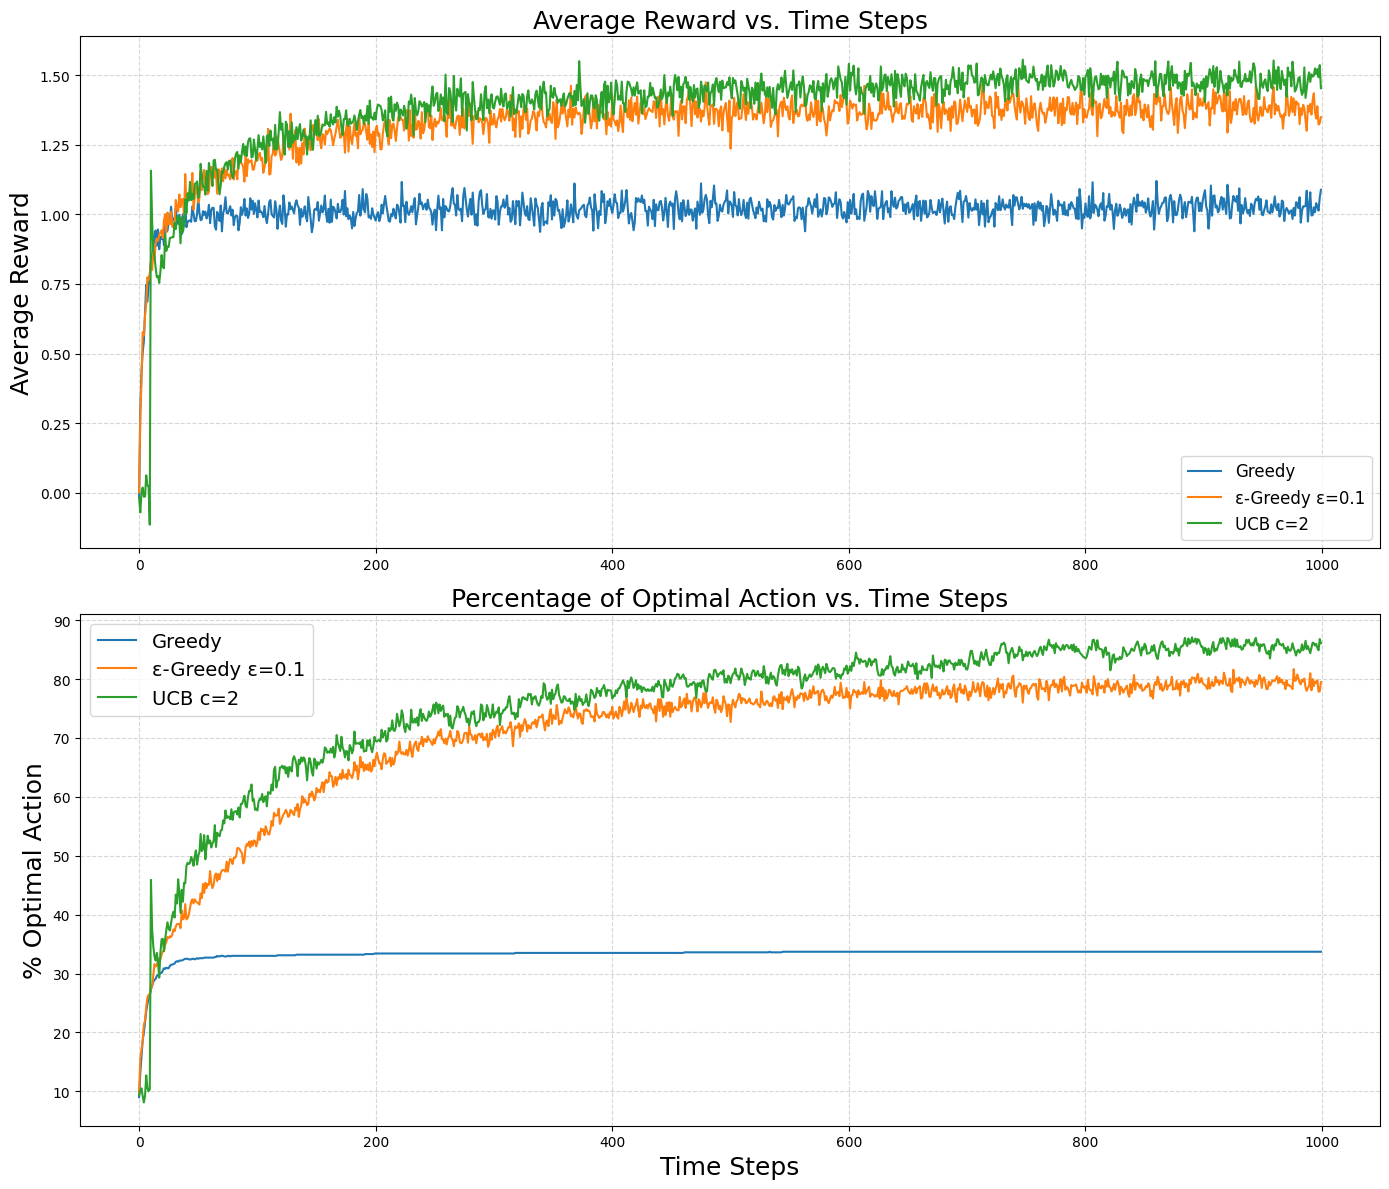

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_actions = 10         # Number of actions (arms)
num_steps = 1000         # Number of time steps per run
num_runs = 1000          # Number of independent runs (tests)
methods = ['Greedy', 'ε-Greedy ε=0.1', 'UCB c=2']
c_value = 2  # UCB exploration parameter

# Initialize arrays to store average rewards and optimal action percentages
average_rewards = np.zeros((len(methods), num_steps))
optimal_action_counts = np.zeros((len(methods), num_steps))

# Loop over each method
for idx, method in enumerate(methods):
    rewards = np.zeros((num_runs, num_steps))          # Rewards for each run and step
    optimal_actions = np.zeros((num_runs, num_steps))  # Optimal action indicator

    # Set method-specific parameters
    if method == 'Greedy':
        epsilon = 0
        initial_Q = 0
        use_ucb = False
    elif method == 'ε-Greedy ε=0.1':
        epsilon = 0.1
        initial_Q = 0
        use_ucb = False
    elif method == 'UCB c=2':
        epsilon = 0  # Not used in UCB
        initial_Q = 0
        use_ucb = True

    # Loop over each run
    for run in range(num_runs):
        # Initialize true action values q*(a) for this run from N(0,1)
        q_star = np.random.normal(0, 1, num_actions)

        # Identify the optimal action(s)
        optimal_action = np.argmax(q_star)

        # Initialize estimated action values Q(a) with specified initial value
        Q = np.ones(num_actions) * initial_Q

        # Initialize action counts N(a) to zero
        N = np.zeros(num_actions)

        # Loop over each time step
        for step in range(num_steps):
            if use_ucb:
                # UCB action selection
                if 0 in N:
                    # Select actions with N(a) = 0 to ensure each action is tried at least once
                    untried_actions = np.where(N == 0)[0]
                    action = np.random.choice(untried_actions)
                else:
                    # Compute UCB values
                    ucb_values = Q + c_value * np.sqrt(np.log(step + 1) / N)
                    # Select action with highest UCB value
                    max_ucb = np.max(ucb_values)
                    actions_with_max_ucb = np.where(ucb_values == max_ucb)[0]
                    action = np.random.choice(actions_with_max_ucb)
            else:
                # ε-Greedy action selection
                if np.random.rand() < epsilon:
                    # Exploration: choose a random action
                    action = np.random.randint(num_actions)
                else:
                    # Exploitation: choose the action(s) with the highest estimated value
                    max_Q = np.max(Q)
                    actions_with_max_Q = np.where(Q == max_Q)[0]
                    action = np.random.choice(actions_with_max_Q)

            # Check if the chosen action is optimal
            if action == optimal_action:
                optimal_actions[run, step] = 1  # Mark as optimal action selected

            # Receive reward from the selected action
            reward = np.random.normal(q_star[action], 1)

            # Update action count
            N[action] += 1

            # Update estimated action value using sample-average method
            Q[action] += (reward - Q[action]) / N[action]

            # Store reward
            rewards[run, step] = reward

    # Calculate average reward over all runs for each time step
    average_rewards[idx] = rewards.mean(axis=0)

    # Calculate percentage of optimal action selections over all runs for each time step
    optimal_action_counts[idx] = optimal_actions.mean(axis=0) * 100

# Plotting the results
plt.figure(figsize=(14, 12))

# First subplot: Average Reward vs. Time Steps
plt.subplot(2, 1, 1)
for idx, method in enumerate(methods):
    plt.plot(average_rewards[idx], label=method)
plt.title('Average Reward vs. Time Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Second subplot: Percentage of Optimal Action vs. Time Steps
plt.subplot(2, 1, 2)
for idx, method in enumerate(methods):
    plt.plot(optimal_action_counts[idx], label=method)
plt.title('Percentage of Optimal Action vs. Time Steps', fontsize=18)
plt.xlabel('Time Steps', fontsize=18)
plt.ylabel('% Optimal Action', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Bandit UCB.jpg', format='jpeg')
# Display the plots
plt.show()


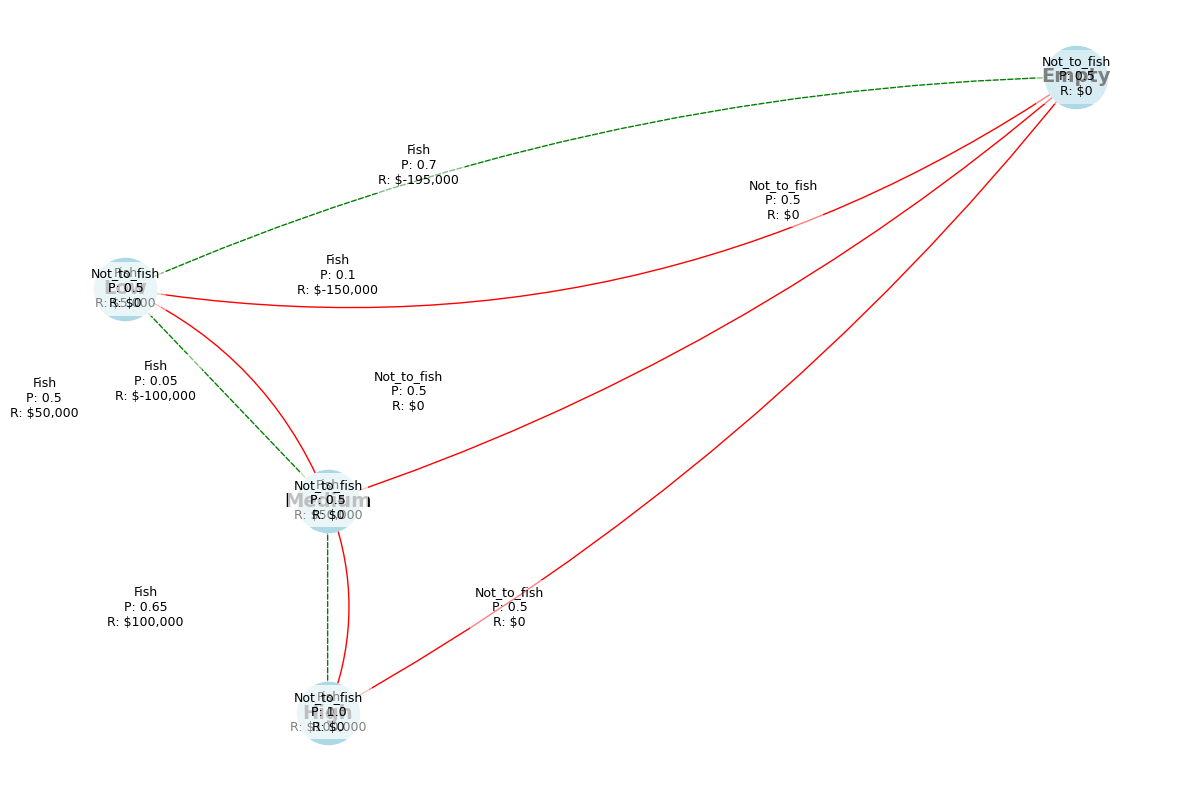

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed multigraph to represent the MDP
G = nx.MultiDiGraph()

# Define the states
states = ['Empty', 'Low', 'Medium', 'High']

# Add states as nodes in the graph
G.add_nodes_from(states)

# Define the transitions: (from_state, to_state, action, probability, reward)
transitions = [
    # From 'Empty' state
    ('Empty', 'Empty', 'Not_to_fish', 0.5, 0),
    ('Empty', 'Low', 'Not_to_fish', 0.5, 0),

    # From 'Low' state
    # Action: Fish
    ('Low', 'Empty', 'Fish', 0.7, -195000),
    ('Low', 'Low', 'Fish', 0.3, 5000),
    # Action: Not_to_fish
    ('Low', 'Low', 'Not_to_fish', 0.5, 0),
    ('Low', 'Medium', 'Not_to_fish', 0.5, 0),

    # From 'Medium' state
    # Action: Fish
    ('Medium', 'Empty', 'Fish', 0.1, -150000),
    ('Medium', 'Low', 'Fish', 0.5, 50000),
    ('Medium', 'Medium', 'Fish', 0.4, 50000),
    # Action: Not_to_fish
    ('Medium', 'Medium', 'Not_to_fish', 0.5, 0),
    ('Medium', 'High', 'Not_to_fish', 0.5, 0),

    # From 'High' state
    # Action: Fish
    ('High', 'Empty', 'Fish', 0.05, -100000),
    ('High', 'Medium', 'Fish', 0.65, 100000),
    ('High', 'High', 'Fish', 0.3, 100000),
    # Action: Not_to_fish
    ('High', 'High', 'Not_to_fish', 1.0, 0),
]

# Add edges to the graph with attributes for action, probability, and reward
for from_state, to_state, action, prob, reward in transitions:
    G.add_edge(from_state, to_state, action=action, probability=prob, reward=reward)

# Use pydot layout for better visualization
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')  # 'dot' is suitable for directed graphs

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', ax=ax)

# Draw the node labels (state names)
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold', ax=ax)

# Prepare edge styles and labels
edge_colors = []
edge_styles = []
edge_labels = {}

# Iterate over the edges to collect styles and labels
for u, v, k, data in G.edges(keys=True, data=True):
    label = f"{data['action']}\nP: {data['probability']}\nR: ${data['reward']:,}"
    key = (u, v, k)
    edge_labels[key] = label

    # Define edge styles based on actions
    if data['action'] == 'Fish':
        edge_colors.append('red')
        edge_styles.append('solid')
    else:
        edge_colors.append('green')
        edge_styles.append('dashed')

# Draw the edges (transitions), including self-loops
edge_list = list(G.edges(keys=True))
for i, (u, v, k) in enumerate(edge_list):
    data = G[u][v][k]
    if u == v:
        rad = 0.25  # Higher curvature for self-loops
    else:
        rad = 0.1 * (i % 5)  # Adjust curvature to prevent overlaps
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=[(u, v)],
        arrows=True,
        arrowstyle='-|>',
        arrowsize=20,
        edge_color=edge_colors[i],
        style=edge_styles[i],
        connectionstyle=f'arc3,rad={rad}',
        ax=ax
    )

# Manually add edge labels for multiedges
for i, (u, v, k) in enumerate(edge_list):
    data = G[u][v][k]
    label = edge_labels[(u, v, k)]

    # Calculate the position for the label
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    if u == v:
        # Position label for self-loop
        angle = 0.0
        xy = (x1, y1)
        offset = (0.05 * (i + 1), 0.05 * (i + 1))
    else:
        # Position label along the edge with offset
        angle = 0.5
        dx = x2 - x1
        dy = y2 - y1
        length = (dx**2 + dy**2)**0.5
        nx1 = x1 + dx * 0.5 - dy * rad * 0.5
        ny1 = y1 + dy * 0.5 + dx * rad * 0.5
        xy = (nx1, ny1)
        offset = (0, 0)

    # Add the label
    ax.annotate(
        label,
        xy=xy,
        textcoords='offset points',
        xytext=offset,
        fontsize=9,
        ha='center',
        va='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'),
        arrowprops=dict(arrowstyle='-')
    )

# Remove the axes for better visualization
plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display the graph
plt.show()


In [5]:
!sudo apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-5+deb11u1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
pip install pydot